# MNIST Handwriting Recognition Example

In [1]:
import os, sys
from matplotlib import pyplot as plt

In [2]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils import np_utils

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### Read in MNIST dataset

In [3]:
from keras.datasets import mnist

In [4]:
(X_train_orig, Y_train_orig), (X_test_orig, Y_test_orig) = mnist.load_data()
X_train, Y_train, X_test, Y_test = X_train_orig.copy(), Y_train_orig.copy(), X_test_orig.copy(), Y_test_orig.copy()
Y_test_labels = Y_test

print(X_train.shape); print(Y_train.shape);
print(X_test.shape); print(Y_test.shape);

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


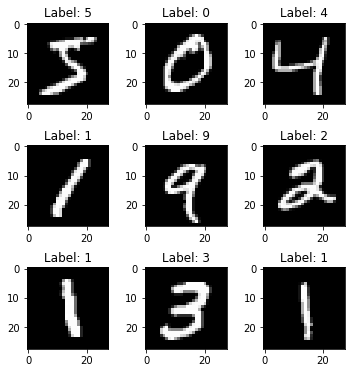

In [5]:
f = plt.figure(figsize=(6, 6))
for i in range(9):
    ax = f.add_subplot(3, 3, i+1)
    ax.imshow(X_train_orig[i], cmap='gray', interpolation='none')
    plt.title("Label: {}".format(Y_train_orig[i]))
plt.subplots_adjust(hspace = 0.5)
plt.show()

### Preprocessing

In [6]:
# Pre-process input data so that we can define it to have depth of 1 (since all images are in black/white):
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

# For the MNIST dataset, The pixel values are grayscale, defined as a number between 0 and 255. It is almost always a good idea to
# perform some scaling of the inputs when using neural networks. This is easily done here by dividing the X matrices by 255:
X_train /= 255
X_test /= 255

In [7]:
# Reshape response variables from a single vector to dummy-coded matrix with 10 categories:
Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)
print(Y_train.shape); print(Y_test.shape);

(60000, 10)
(10000, 10)


### Build basic CNN model

In [8]:
# Start:
model = Sequential()

# First convolution layer (notice we define input shape as 28x28x1):
model.add(Convolution2D(filters=32, kernel_size=(5, 5), padding='valid', input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Second convolution layer:
model.add(Convolution2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

# Add 2 fully connected layers:
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

# Output layer (softmax activation):
model.add(Dense(10, activation='softmax'))

In [9]:
# Summary of the model architecture:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 16)        4624      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
__________

### Compile and train

In [10]:
# Define the loss function, optimizer, batch size, and number of epochs:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=128, epochs=12, validation_split=0.2, verbose=1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/12
48000/48000 [==============================] - 18s 365us/step - loss: 0.4401 - acc: 0.8590 - val_loss: 0.1040 - val_acc: 0.9675
Epoch 2/12
48000/48000 [==============================] - 2s 35us/step - loss: 0.1108 - acc: 0.9661 - val_loss: 0.0655 - val_acc: 0.9806
Epoch 3/12
48000/48000 [==============================] - 2s 39us/step - loss: 0.0831 - acc: 0.9739 - val_loss: 0.0557 - val_acc: 0.9824
Epoch 4/12
48000/48000 [==============================] - 2s 34us/step - loss: 0.0664 - acc: 0.9794 - val_loss: 0.0475 - val_acc: 0.9867
Epoch 5/12
48000/48000 [==============================] - 2s 35us/step - loss: 0.0595 - acc: 0.9806 - val_loss: 0.0442 - val_acc: 0.9872
Epoch 6/12
48000/48000 [==============================] - 2s 34us/step - loss: 0.0531 - acc: 0.9826 - val_loss: 0.0397 - val_acc: 0.9884
Epoch 7/12
48000/48000 [==============================] - 2s 34us/step - loss: 0.0480 - acc: 0.9842 - val_loss: 0.0393 - val_a

### Evaluation on test data

In [11]:
# Test data predictions:
test_probabilities = model.predict(X_test)
test_predictions = [np.where(test_probabilities[i] == max(test_probabilities[i]))[0][0] for i in range(len(test_probabilities))]

In [12]:
# Accuracy evaluation:
test_evaluation = model.evaluate(X_test, Y_test, verbose=2)
print('Test accuracy:', test_evaluation[1])

Test accuracy: 0.9917


### View some of the predictions

In [13]:
import random

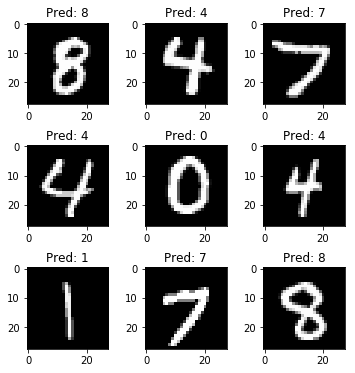

In [15]:
# Sample of predictions:
smpl = [random.randint(0, len(test_predictions)) for i in range(10)]

f = plt.figure(figsize=(6, 6))
for i in range(9):
    n = smpl[i]
    ax = f.add_subplot(3, 3, i+1)
    ax.imshow(X_test_orig[n], cmap='gray', interpolation='none')
    plt.title("Pred: {}".format(test_predictions[n]))
plt.subplots_adjust(hspace = 0.5)
plt.show()

In [16]:
# View some of the incorrect predictions:
incorrects = [i for i in range(len(test_predictions)) if test_predictions[i] != Y_test_orig[i]]

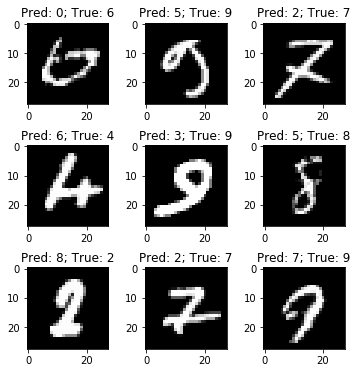

In [18]:
incorrect_smpl = [incorrects[i] for i in sorted(random.sample(range(len(incorrects)), 9))]

f = plt.figure(figsize=(6, 6))
for i in range(9):
    n = incorrect_smpl[i]
    ax = f.add_subplot(3, 3, i+1)
    ax.imshow(X_test_orig[n], cmap='gray', interpolation='none')
    plt.title("Pred: {}; True: {}".format(test_predictions[n], Y_test_orig[n]))
plt.subplots_adjust(hspace = 0.5)
plt.show()